# PandasAI: Unlocking the Power of Data with Generative AI
- 데이터 처리로 유명한 Pandas 패키지에서 PandasAI 가 나왔습니다. 여러 LLM (OpenAI, CodeStar, Falcon, Bard) 을 연결하여 "자연어" 로 물어 보고 데이터를 분석 할 수 있습니다.
- https://levelup.gitconnected.com/pandasai-unlocking-the-power-of-data-with-generative-ai-3196cbccba34
- Data File
    - https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023?resource=download

## Reference: 
- PANDASAI documentation
    - https://pandas-ai.readthedocs.io/en/latest/llms/


## 1. 필요 패키지 설치

In [4]:
is_first_use = True
# is_first_use = False

if is_first_use:
    ! pip install pandasai --quiet
    ! pip install BeautifulSoup4 --quiet
    


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


## 2. OpenAPI Key 입력

In [8]:
import os
os.environ["OPENAI_API_KEY"]='TYPE Your Key' 



## 3.PandasAI 오브젝트에 OpenAI 모델 연결

In [12]:
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

llm = OpenAI(api_key=os.environ["OPENAI_API_KEY"])
print("llm: \n", llm.model)
pandas_ai = PandasAI(llm=llm)


llm: 
 gpt-3.5-turbo


## 4. 데이타 로딩

In [13]:
import pandas as pd

data_path = "data/ds_salaries.csv"
df = pd.read_csv(data_path)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## 5. 자연어로 여러가지 질문

In [14]:
response=pandas_ai.run(df, prompt='List the first 5 job titles by salary in usd')
print(response)

['Research Scientist', 'Data Analyst', 'AI Scientist', 'Applied Machine Learning Scientist', 'Principal Data Scientist']


In [17]:
response=pandas_ai.run(df, prompt='What is the average salary in usd by job titles? Make sure the output is sorted in descending order.')
print(response)

job_title
Data Science Tech Lead           375000.000
Cloud Data Architect             250000.000
Data Lead                        212500.000
Data Analytics Lead              211254.500
Principal Data Scientist         198171.125
                                    ...    
Autonomous Vehicle Technician     26277.500
3D Computer Vision Researcher     21352.250
Staff Data Analyst                15000.000
Product Data Scientist             8000.000
Power BI Developer                 5409.000
Name: salary_in_usd, Length: 93, dtype: float64


In [16]:
response=pandas_ai.run(df, prompt='직책별 평균 급여는 얼마입니까? 출력이 내림차순으로 정렬되었는지 확인하십시오.')
print(response)

job_title
Head of Machine Learning          6.000000e+06
Principal Data Architect          3.000000e+06
Lead Machine Learning Engineer    2.548667e+06
Lead Data Scientist               9.284853e+05
Data Analytics Lead               9.225000e+05
                                      ...     
Insight Analyst                   3.850000e+04
Compliance Data Analyst           3.000000e+04
Autonomous Vehicle Technician     2.627750e+04
Staff Data Analyst                1.500000e+04
Product Data Scientist            8.000000e+03
Name: salary, Length: 93, dtype: float64


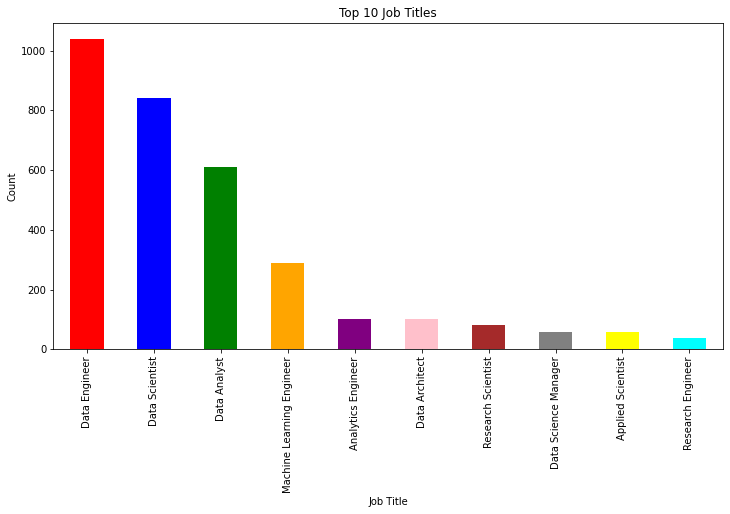

None


In [18]:
response=pandas_ai.run(df, prompt='Plot a bar chart showing top 10 job titles, using different colors for each bar')
print(response)

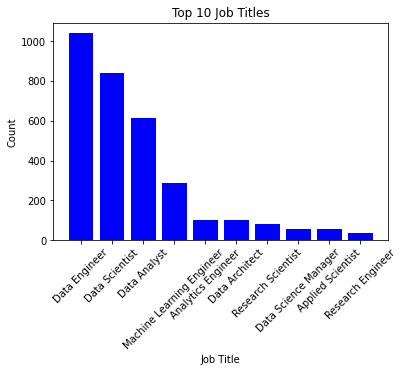

None


In [19]:
response=pandas_ai.run(df, prompt='각 막대에 다른 색상을 사용하여 상위 10개 직함을 보여주는 막대 차트를 그립니다.')
print(response)

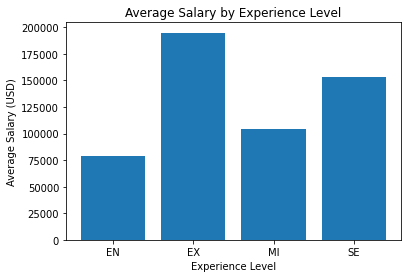

None


In [20]:
response=pandas_ai.run(df, prompt='Plot a bar chart showing average salary in usd by experience level')
print(response)

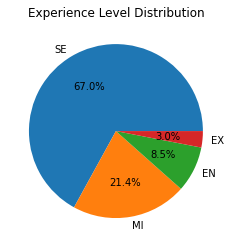

None


In [21]:
response=pandas_ai.run(df, prompt='Plot a pie chart showing the experience level distribution')
print(response)

In [22]:
response=pandas_ai.run(df, prompt='Summarize as text using the figures showing the experience level distribution')
print(response)

The distribution of experience levels in the dataset is as follows:
- SE: 2516 (67.00%)
- MI: 805 (21.44%)
- EN: 320 (8.52%)
- EX: 114 (3.04%)



In [23]:
response=pandas_ai.run(df, prompt='경력 수준 분포를 나타내는 수치를 사용하여 텍스트로 요약')
print(response)

SE: 67.00%
MI: 21.44%
EN: 8.52%
EX: 3.04%



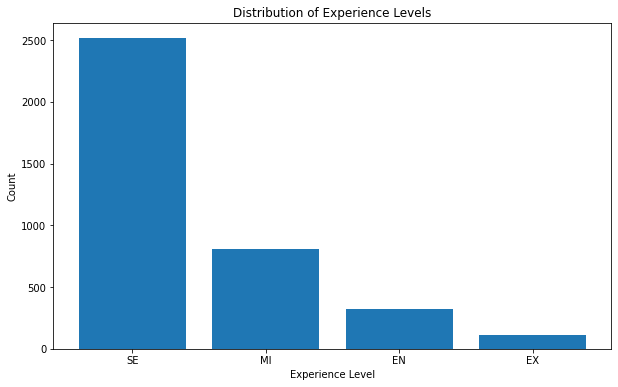

None


In [24]:
response=pandas_ai.run(df, prompt='Generate narrative using the figures showing the experience level distribution')
print(response)

In [25]:
response=pandas_ai.run(df, prompt='경험 수준 분포를 나타내는 수치를 사용하여 내러티브 생성')
print(response)

The distribution of experience levels in the dataset is as follows:
- SE: 67.00%
- MI: 21.44%
- EN: 8.52%
- EX: 3.04%



In [26]:
response=pandas_ai.run(df, prompt='경험 수준 분포를 나타내는 수치를 사용하여 요약 생성')
print(response)

SE    0.670040
MI    0.214381
EN    0.085220
EX    0.030360
Name: experience_level, dtype: float64
